In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import pickle

## Download the dataset

In [2]:
features = 'MFCCs'

# df = pd.read_csv('data/CETUC_Features_data.csv')
df = pd.read_csv(f'data/CETUC_{features}_data.csv')
df.head()

,FileName,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20,Gender
0,F003-0616.wav,-451.64330,120.34800,-2.872225,47.237850,-0.977582,13.857303,-4.630294,3.966301,1.860328,...,-1.193695,-4.170928,-6.661058,-0.238222,-9.994849,0.035242,-7.937756,-6.492932,-9.149591,0
1,F000-0823.wav,-309.70892,96.34725,10.261569,34.542908,6.847061,-7.365472,-4.725027,-4.484074,-1.018457,...,-4.834370,1.460012,0.723206,1.243340,3.026395,6.535556,6.572198,6.004393,2.495779,0
2,M009-0399.wav,-351.83615,133.79265,5.291138,34.379498,-3.051024,17.129290,-18.453335,10.407355,1.173181,...,-5.890615,3.383151,-4.538214,9.257086,-1.547871,3.313380,2.661653,2.677031,-0.651741,1
3,F033-0492.wav,-320.95276,113.08917,3.074278,52.792080,-5.408656,13.092081,-17.207413,4.061078,-0.398100,...,-4.014392,-2.159251,-4.752053,11.259323,-3.639835,2.808701,4.757501,1.385649,0.782601,0
4,M029-0430.wav,-369.07828,117.03207,-19.248900,41.389400,14.482154,22.141537,3.132720,-3.865579,-5.833462,...,-14.316450,-1.992915,-12.527349,-5.694922,-4.658013,-3.816001,-7.329155,-6.387514,-2.459448,1


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes and separate diferent speakers.

In [3]:
mydata_test = df[df['FileName'].str.match('F050') | df['FileName'].str.match('F049') | df['FileName'].str.match('F048') | df['FileName'].str.match('F047') | df['FileName'].str.match('F046') | 
                df['FileName'].str.match('F045') | df['FileName'].str.match('F044') | df['FileName'].str.match('F043') | df['FileName'].str.match('F042') | df['FileName'].str.match('F041') | 
                df['FileName'].str.match('M049') | df['FileName'].str.match('M048') | df['FileName'].str.match('M047') | df['FileName'].str.match('M046') | df['FileName'].str.match('M045') | 
                df['FileName'].str.match('M044') | df['FileName'].str.match('M043') | df['FileName'].str.match('M042') | df['FileName'].str.match('M041') | df['FileName'].str.match('M040')] 

mydata_train = df.merge(mydata_test[['FileName']], on=['FileName'], how='left', indicator=True)
mydata_train = mydata_train[mydata_train['_merge'] == 'left_only']


print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the test data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the test data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 40997
Masculine voices in the training data: 40000
Feminine voices in the test data: 10000
Masculine voices in the test data: 10000


In [4]:
mydata_train.head()

,FileName,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20,Gender,_merge
0,F003-0616.wav,-451.64330,120.34800,-2.872225,47.237850,-0.977582,13.857303,-4.630294,3.966301,1.860328,...,-4.170928,-6.661058,-0.238222,-9.994849,0.035242,-7.937756,-6.492932,-9.149591,0,left_only
1,F000-0823.wav,-309.70892,96.34725,10.261569,34.542908,6.847061,-7.365472,-4.725027,-4.484074,-1.018457,...,1.460012,0.723206,1.243340,3.026395,6.535556,6.572198,6.004393,2.495779,0,left_only
2,M009-0399.wav,-351.83615,133.79265,5.291138,34.379498,-3.051024,17.129290,-18.453335,10.407355,1.173181,...,3.383151,-4.538214,9.257086,-1.547871,3.313380,2.661653,2.677031,-0.651741,1,left_only
3,F033-0492.wav,-320.95276,113.08917,3.074278,52.792080,-5.408656,13.092081,-17.207413,4.061078,-0.398100,...,-2.159251,-4.752053,11.259323,-3.639835,2.808701,4.757501,1.385649,0.782601,0,left_only
4,M029-0430.wav,-369.07828,117.03207,-19.248900,41.389400,14.482154,22.141537,3.132720,-3.865579,-5.833462,...,-1.992915,-12.527349,-5.694922,-4.658013,-3.816001,-7.329155,-6.387514,-2.459448,1,left_only


In [5]:
if features == 'MFCCs':
    data_x_train = mydata_train[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()


In [6]:
scaler = StandardScaler()
scaler.fit(data_x_train)
X_train = pd.DataFrame(scaler.transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.transform(data_x_test), columns=data_x_test.columns)
pickle.dump(scaler, open('models/scaler.pkl', 'wb'))

In [7]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_DecisionTree.sav'
pickle.dump(tree, open(filename, 'wb'))
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_RandomForest.sav'
pickle.dump(forest, open(filename, 'wb'))
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_GradientBoosting.sav'
pickle.dump(gbrt, open(filename, 'wb'))
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#Train logistic regression model
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_LogisticRegression.sav'
pickle.dump(lgr, open(filename, 'wb'))
print("\nLogisticRegression")
print("Accuracy on training set: {:.3f}".format(lgr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lgr.score(X_test, y_test)))

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
filename = f'models/CETUC_{features}_SVM.sav'
pickle.dump(svm, open(filename, 'wb'))
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_MLP.sav'
pickle.dump(mlp, open(filename, 'wb'))
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.750

Random Forests
Accuracy on training set: 0.998
Accuracy on test set: 0.818

Gradient Boosting
Accuracy on training set: 0.968
Accuracy on test set: 0.858

LogisticRegression
Accuracy on training set: 0.937
Accuracy on test set: 0.884

Support Vector Machine
Accuracy on training set: 0.995
Accuracy on test set: 0.897

Multilayer Perceptron
Accuracy on training set: 1.000
Accuracy on test set: 0.882


In [8]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

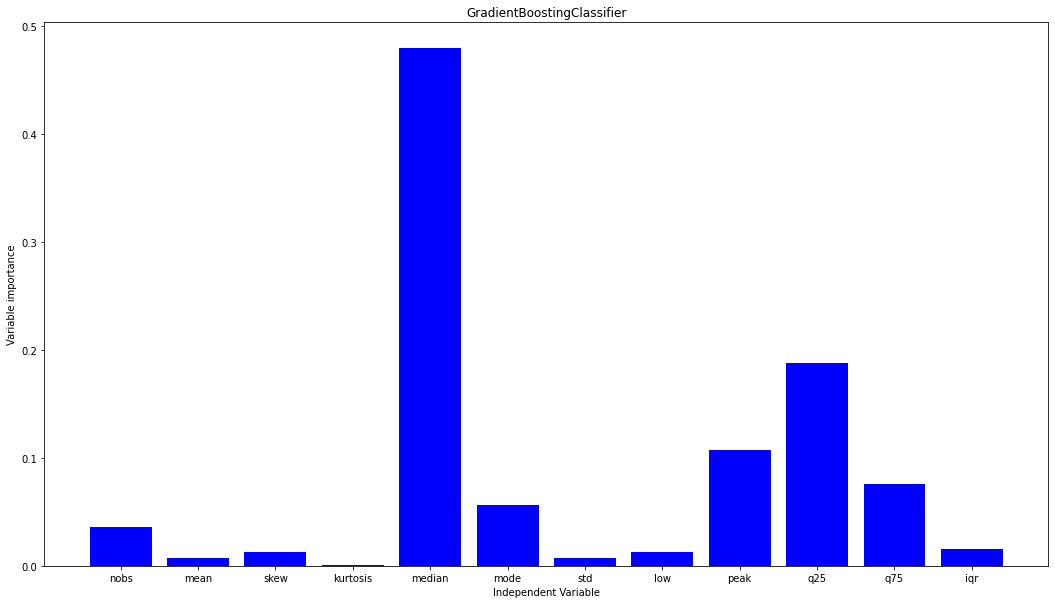

In [9]:
plot_feature_importances_mydata(gbrt,'blue')

In [ ]:
import tensorflow as tf
from tensorflow import keras

NeuralNetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

NeuralNetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = NeuralNetwork.fit(X_train, y_train,validation_split=0.2, epochs=100, verbose=4)

test_loss, test_acc = NeuralNetwork.evaluate(X_test,  y_test, verbose=0)


print('\nTest accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()